G2M Case Study:

XYZ is a private equity firm in US. Due to remarkable growth in the Cab Industry in last few years and
multiple key players in the market, it is planning for an investment in Cab industry.

Objective : Provide actionable insights to help XYZ firm in identifying the right company for making
investment.

The analysis has been divided into four parts:

Data Understanding

Forecasting profit and number of rides for each cab type

Finding the most profitable Cab company

Recommendations for investment

DATA EXPLORATION:

We have a total of 355,032 data points

We also have 4 .csv files:

-Cab_Data.csv: 7 features

-City.csv: 3 features

-Customer_ID.csv: 4 features

-Transaction_ID.csv: 3 features

- PROFIT ANALYSIS

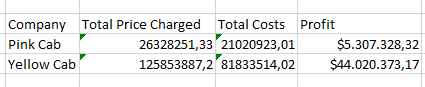

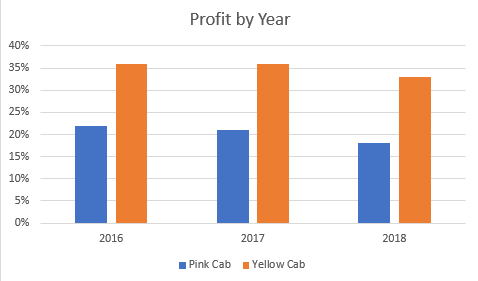

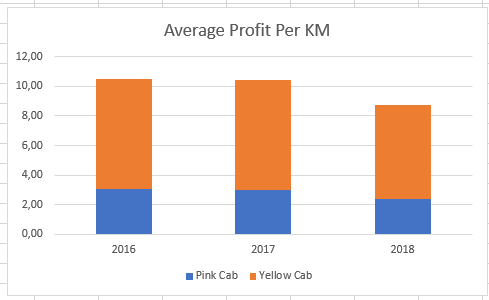

-Profit Gender WISE:

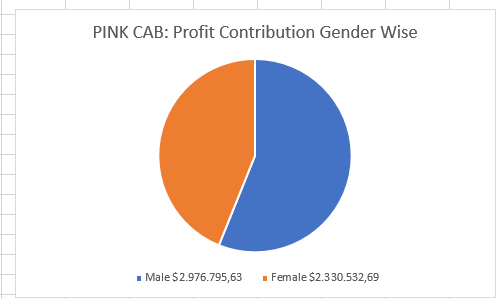

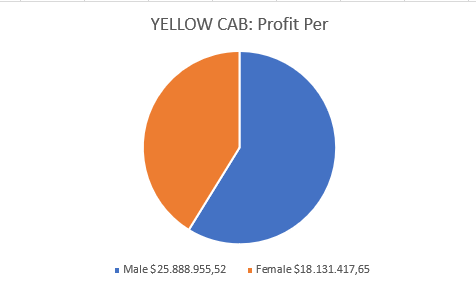

-Profit Based on income of customers

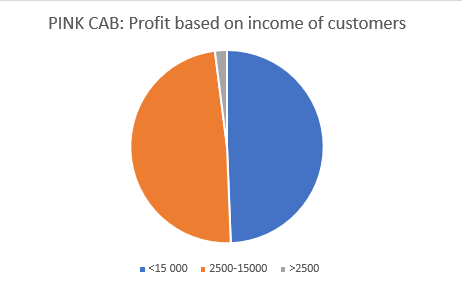

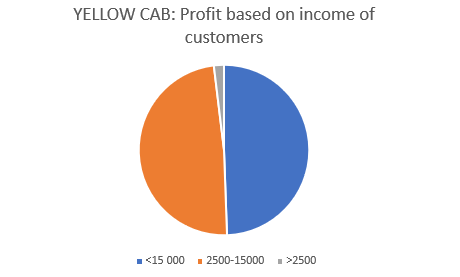

- Seasonality in the demand

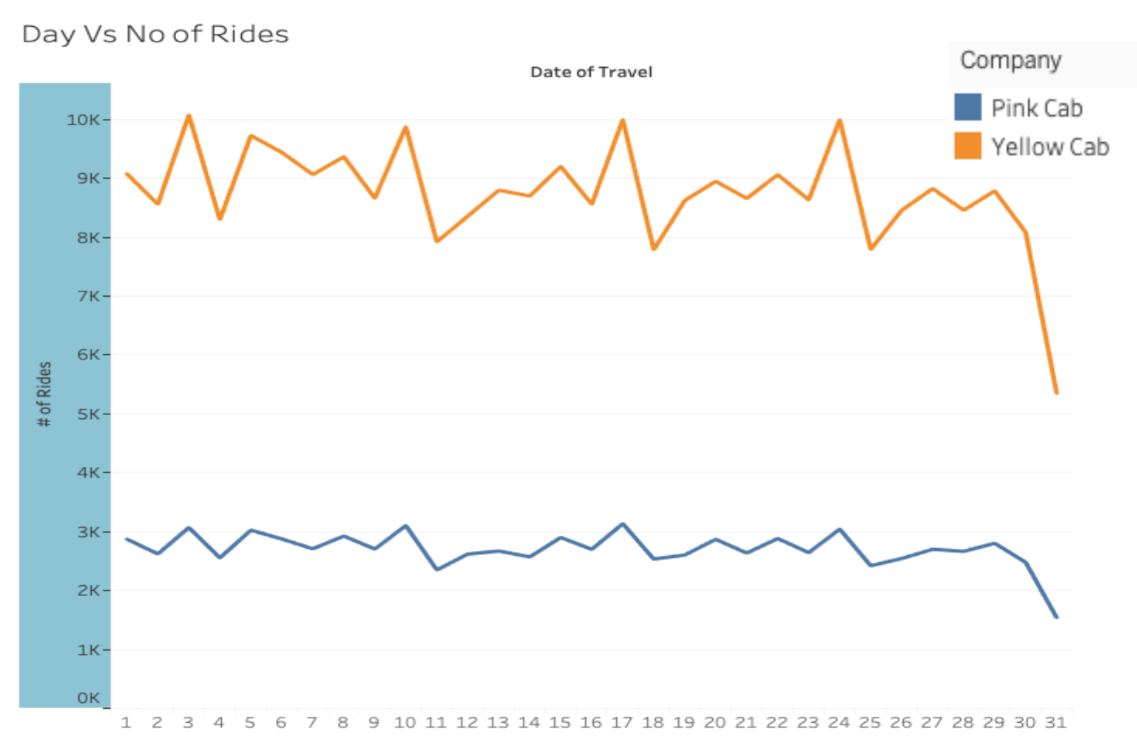

RECOMMENDATIONS

We have evaluated both companies on the following points:

- Profit of Previous 3 years: Yellow cab has made around 9 times more profit than Pink Cab did during the period of 2016-2018
- Profit by Year: We observed a decline in profit in both companies, nevertheless, Yellow Cab still has a much higher profit percentage each year averaging around 34.6% profit, while Pink Cab only averages 18.97%.
- Average Profit Per KM: Yellow Cab profits almost 2.6 more times than Pink Cab does in each km traveled
- Profit Gender Wise: Males contribute the most to both companies profits and at around the same percentage.
- Profit based on income: By analyzing the data, we observed that customers, in both companies, belong to similar social class. We also notice that both companies make the most profit off of customers with higher income (>15 000).
- Seasonality in the demand: We noticed that the demand spikes in both companies on the weekends. However, the demand on Yellow cab services remain significantly higher.

Based on those points, we recommend the investment in Yellow Cab.
